<a href="https://colab.research.google.com/github/GdGato/Fast_IA/blob/339/Introducci%C3%B3n_a_Visi%C3%B3n_por_Computadora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Visión por Computadora

In [1]:
from fastai.vision.all import *

Este tutorial se centra en cómo construir rápidamente un 'Learner' y ajustar finamente un modelo preentrenado en la mayoría de las tareas de visión por computadora.

## Clasificación de una sola etiqueta

Para esta tarea, utilizaremos el conjunto de datos [Oxford-IIIT Pet](https://www.robots.ox.ac.uk/~vgg/data/pets/), que contiene imágenes de gatos y perros de 37 razas diferentes. Primero mostraremos cómo construir un clasificador simple de gatos contra perros y luego un modelo un poco más avanzado que puede clasificar todas las razas.

El conjunto de datos se puede descargar y descomprimir con la siguiente línea de código:

In [2]:
path = untar_data(URLs.PETS)

Solo realizará esta descarga una vez y devolverá la ubicación del archivo descomprimido. Podemos verificar qué hay dentro con el método **.ls()**.

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

Ignoraremos la carpeta de anotaciones por ahora y nos centraremos en la de imágenes. '[get_image_files](https://docs.fast.ai/data.transforms.html#get_image_files)' es una función de fastai que nos ayuda a obtener todos los archivos de imagen (de forma recursiva) en una carpeta.

In [4]:
files = get_image_files(path/"images")
len(files)

7390

## Diferenciación entre Gatos y Perros en la Etiquetación de Datos

Para etiquetar nuestros datos en el problema de clasificación entre gatos y perros, es necesario identificar qué nombres de archivo corresponden a imágenes de perros y cuáles a imágenes de gatos. Existe una manera sencilla de distinguirlos: el nombre del archivo comienza con una letra mayúscula para gatos y con una letra minúscula para perros.


In [5]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_27.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_174.jpg'))

Podemos definir una función de etiquetado sencilla de la siguiente manera:





In [6]:
def label_func(f): return f[0].isupper()

Para preparar nuestros datos para un modelo, es necesario colocarlos en un objeto [DataLoaders](https://docs.fast.ai/data.core.html#dataloaders). En este caso, contamos con una función que etiqueta utilizando los nombres de archivo, por lo que utilizaremos [ImageDataLoaders.from_name_func](https://docs.fast.ai/vision.data.html#imagedataloaders.from_name_func). Existen otros métodos de fábrica en [ImageDataLoaders](https://docs.fast.ai/vision.data.html#imagedataloaders) que podrían ser más adecuados para su problema, así que asegúrese de revisarlos todos en `vision.data`.


In [8]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Hemos pasado a esta función el directorio en el que estamos trabajando, los archivos que hemos obtenido, nuestra `label_func` y una última pieza llamada `item_tfms`. Esta última es una transformación aplicada a todos los elementos de nuestro conjunto de datos que redimensionará cada imagen a 224 por 224. Esto se logra mediante un recorte aleatorio en la dimensión más grande para hacerlo cuadrado, seguido de un redimensionamiento a 224 por 224. Si no proporcionamos esto, obtendríamos un error más adelante, ya que sería imposible agrupar los elementos en lotes.

Luego, podemos verificar si todo parece estar bien con el método [show_batch](https://docs.fast.ai/vision.gan.html#show_batch) (True corresponde a gato, False a perro):


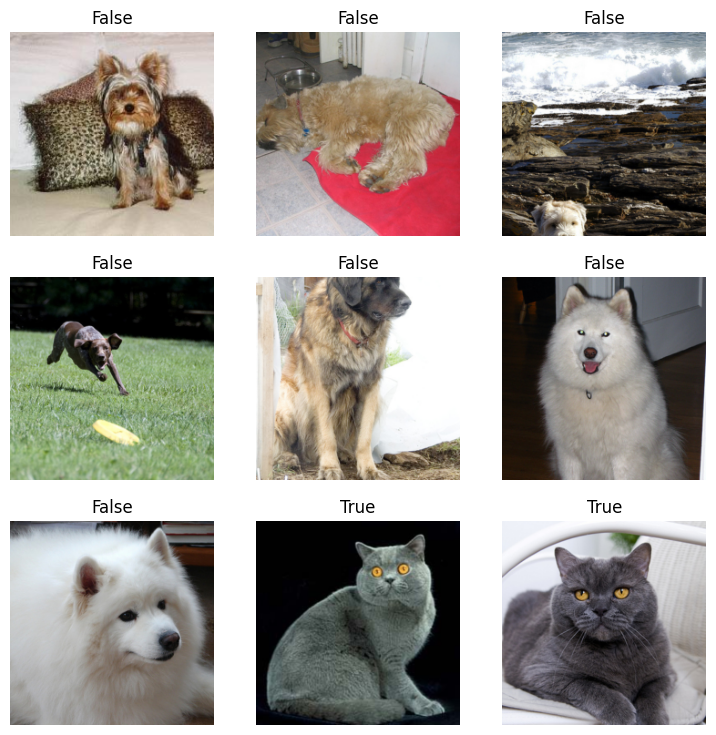

In [9]:
dls.show_batch()

Podemos crear un [Learner](https://docs.fast.ai/learner.html#learner), que es un objeto de fastai que combina los datos y un modelo para el entrenamiento, y utiliza transfer learning para ajustar finamente un modelo preentrenado en solo dos líneas de código:


In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate) #Crea un modelo "learner", con ResNet34
learn.fine_tune(1) #Entrenandolo 1 epoca

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 43.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.161910,0.022613,0.006766,37:00


epoch,train_loss,valid_loss,error_rate,time
0,0.042121,0.022161,0.005413,54:24


Estás creando un nuevo objeto Learner llamado learn y entrenando ese modelo específico durante una época **(fine_tune(1))**. Sin embargo, si ejecutas este código múltiples veces, estarás sobrescribiendo el objeto learn con un nuevo modelo en cada ejecución. Cada nuevo modelo se inicializará con los mismos parámetros, arquitectura **(ResNet34)**, y configuraciones de datos.

Por lo tanto, aunque estás creando un nuevo modelo cada vez que ejecutas este código, todos esos modelos estarán inicializados de manera similar y tendrán los mismos hiperparámetros iniciales. Si deseas continuar *entrenando el mismo modelo* en lugar de crear uno nuevo cada vez, puedes hacerlo ejecutando más épocas con el mismo objeto Learner. Por ejemplo:

In [ ]:
learn.fine_tune(3)  # Para entrenar por 3 épocas adicionales

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.017985,0.013719,0.005413,37:28


epoch,train_loss,valid_loss,error_rate,time


La primera línea descargó un modelo llamado ResNet34, preentrenado en [ImageNet](https://www.image-net.org/), y lo adaptó a nuestro problema específico. Luego, ajustó finamente ese modelo y en un tiempo relativamente corto, obtuvimos un modelo con una tasa de error muy por debajo del 1%... ¡increíble!

Si deseas hacer una predicción sobre una nueva imagen, puedes utilizar `learn.predict`:


In [ ]:
learn.predict(files[0])

El método `predict` devuelve tres cosas: la predicción decodificada (aquí False para perro), el índice de la clase predicha y el tensor de probabilidades de todas las clases en el orden de sus etiquetas indexadas (en este caso, el modelo tiene bastante confianza de que se trata de un perro). Este método acepta un nombre de archivo, una imagen PIL o un tensor directamente en este caso. También podemos echar un vistazo a algunas predicciones con el método [show_results](https://docs.fast.ai/vision.learner.html#show_results):


In [ ]:
learn.show_results()

Explora otras aplicaciones como texto o tabulares, así como los otros problemas cubiertos en este tutorial, y verás que todos comparten una API consistente para recopilar y visualizar datos, crear un [Learner](https://docs.fast.ai/learner.html#learner), entrenar el modelo y observar algunas predicciones.


## Clasificación de Razas

Para etiquetar nuestros datos con el nombre de la raza, utilizaremos una expresión regular para extraerlo del nombre del archivo. Al observar nuevamente un nombre de archivo:


In [ ]:
files[0].name